
# Plotting
In this tutorial we will explore the basic plotting tools provided by `pykep` via its {py:class}`~pykep.plot` module. The module was built as to facilitate the incremental construction of plots showing trajectories and other important quantities of interest when planning/designing interplanetary missions.

We start importing the basics:

In [1]:
import pykep as pk
import numpy as np

%matplotlib inline

## 3D Plots
### Plot planets

In most cases one would want to start creating a 3D empty canvas where to incrementally add details. To do so we can avoid a direct interaction with the backend `matplotlib` using the convenience {py:class}`~pykep.plot.make_3Daxis` factory:

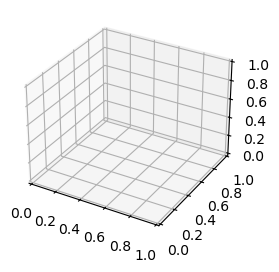

In [2]:
ax = pk.plot.make_3Daxis(figsize = (3,3));

We may then add the Sun and a few planets easily ... in the code below we will make use of the JPL low precision ephemerides, and thus use the {py:class}`~pykep.udpla.jpl_lp` User Defined Planet, but any other udpla would work.

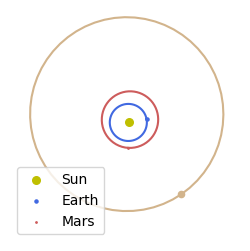

In [3]:
# Earth
udpla = pk.udpla.jpl_lp(body="EARTH")
earth = pk.planet(udpla)

# Mars
udpla = pk.udpla.jpl_lp(body="MARS")
mars = pk.planet(udpla)

#Jupiter
udpla = pk.udpla.jpl_lp(body="JUPITER")
jupiter = pk.planet(udpla)

# Plotting (both the orbit and the planet)
ax = pk.plot.make_3Daxis(figsize = (3,3))
pk.plot.add_sun(ax)

pk.plot.add_planet_orbit(ax, earth, plot_range = [0, 365.25], c = "royalblue", label = "")
pk.plot.add_planet(ax, earth, when = 0, c = "royalblue", s = 5, label="Earth")

pk.plot.add_planet_orbit(ax, mars, label = "", c = "indianred")
pk.plot.add_planet(ax, mars, when = 0, c = "indianred", s = 1, label = "Mars")

pk.plot.add_planet_orbit(ax, jupiter, label = "", c = "tan")
pk.plot.add_planet(ax, jupiter, when = 0, c = "tan")

ax.legend()
ax.set_xlim3d(-4,4)
ax.set_ylim3d(-4,4)
ax.axis('off')
ax.view_init(90,0)

In some cases it may be useful to add solar system planets at once to a plot. The {py:class}`~pykep.plot.add_solar_system` does just that:

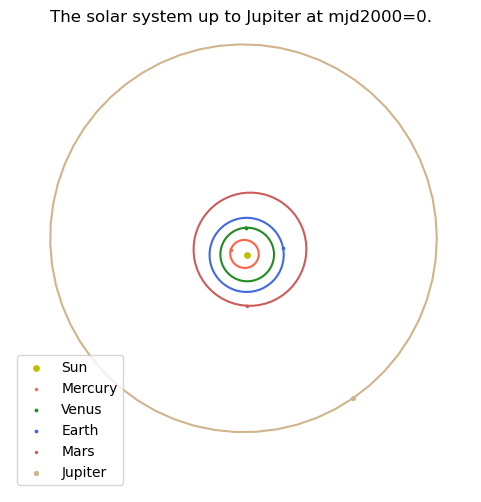

In [4]:
ax = pk.plot.make_3Daxis(figsize = (6,6))
ep = pk.epoch(0)
pk.plot.add_solar_system(ax, bodies = [1,2,3,4,5], when = ep)
ax.view_init(90,0)
ax.legend()
ax.axis('off')
ax.set_xlim3d(-4,4)
ax.set_ylim3d(-4,4)
ax.view_init(90,0)
ax.set_title("The solar system up to Jupiter at mjd2000=0.");

### Plot a Lambert arc
The class {py:class}`~pykep.lambert_problem` is used to compute all ballistic arcs transfering in a fixed time of flight from a starting to a final position. In general there are more solutions for a given geometry, in `pykep` the user can plot all of them easily. Lets see how. First we create a Lambert problem, say an Earth-Mars transfer.

In [5]:
t0 = 4340.
tof_days = 280.22
r0, v0 = earth.eph(t0)
r1, v1 = mars.eph(t0+tof_days)
lp = pk.lambert_problem(r0=r0, r1=r1,mu=pk.MU_SUN, tof=tof_days*pk.DAY2SEC )

We can now assemble a plot 

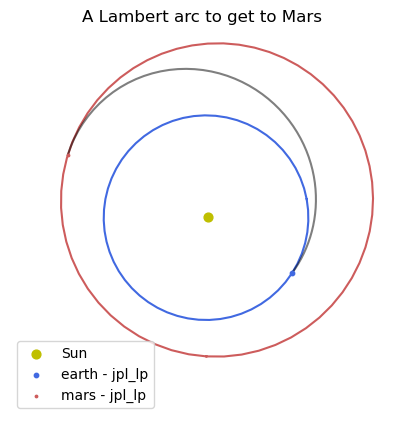

In [6]:
# Making the axis
ax = pk.plot.make_3Daxis(figsize = (5,5))

# Adding the various planets / Sun
pk.plot.add_sun(ax, s=40)

pk.plot.add_planet(ax, earth, when=t0, label = earth.get_name(), c = 'royalblue', s=10)
pk.plot.add_planet_orbit(ax, earth, c = 'royalblue')

pk.plot.add_planet(ax, mars, when=t0 + tof_days, label = mars.get_name(), c = 'indianred', s=3)
pk.plot.add_planet_orbit(ax, mars, c = 'indianred')

# Here we add the Lambert arc
pk.plot.add_lambert(ax, lp, N=60, sol=0, c='k', alpha=0.5)

# Some cosmetics to customize the plot
ax.legend()
ax.axis('off')
ax.set_xlim3d(-1.2,1.2)
ax.set_ylim3d(-1.2,1.2)
ax.view_init(90,0)
ax.set_title("A Lambert arc to get to Mars");


In [7]:
t0 = 2140.
tof_days = 1230.22
r0, v0 = earth.eph(t0)
r1, v1 = mars.eph(t0+tof_days)
lp = pk.lambert_problem(r0=r0, r1=r1,mu=pk.MU_SUN, tof=tof_days*pk.DAY2SEC)

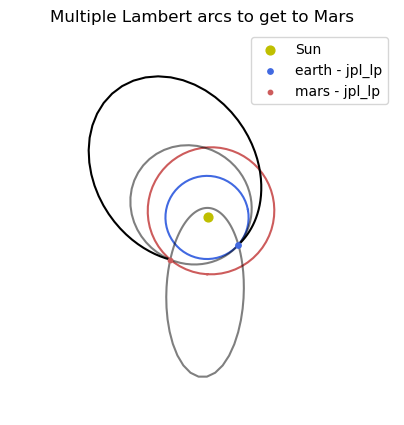

In [8]:
# Making the axis
ax = pk.plot.make_3Daxis(figsize = (5,5))

# Adding the various planets / Sun
pk.plot.add_sun(ax, s=40)

pk.plot.add_planet(ax, earth, when=t0, label = earth.get_name(), c = 'royalblue', s=15)
pk.plot.add_planet_orbit(ax, earth, c = 'royalblue')

pk.plot.add_planet(ax, mars, when=t0 + tof_days, label = mars.get_name(), c = 'indianred', s=10)
pk.plot.add_planet_orbit(ax, mars, c = 'indianred')

# Here we add the Lambert arc
pk.plot.add_lambert(ax, lp, N=60, sol=0, c='k', alpha=1.)
pk.plot.add_lambert(ax, lp, N=60, sol=1, c='k', alpha=0.5)
pk.plot.add_lambert(ax, lp, N=120, sol=2, c='k', alpha=0.5)



# Some cosmetics to customize the plot
ax.legend()
ax.axis('off')
ax.set_xlim3d(-3,3)
ax.set_ylim3d(-3,3)
ax.view_init(90,0)
ax.set_title("Multiple Lambert arcs to get to Mars");


### Plot a Sims-Flanagan trajectory leg.
The class {py:class}`~pykep.leg.sims_flanagan` is used to represent a low-thrust interplanetary trajectory of a spacecraft, modelled using a sequence of impulsive $\Delta V$. We can visualize, using the {py:class}`~pykep.plot` module, this trajectory and inspect visually the underlying discretization. Clarly the trajectory will only close if the throttle sequence (the low-thrust strategy) results in a feasible trajectory. 

Lets start to instantiate a Sims-Flanagan leg, the default constructor will construct a feasible non-dimensional ballistic transfer (with a rather big maximum thrust):

In [9]:
sf = pk.leg.sims_flanagan()
nseg = 20
sf.throttles=[0,0,0] * nseg

which we can immediately visualize, together with a random variation produced by randomly initializing the throttle history:

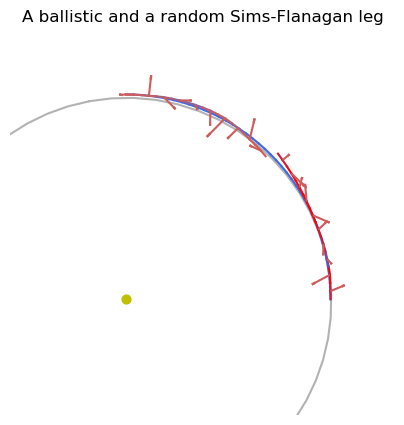

In [10]:
# Making the axis
ax = pk.plot.make_3Daxis(figsize = (5,5))

# Adding the Sun and the Earth for added coolness and reference.
pk.plot.add_sun(ax, s=40)
pk.plot.add_planet_orbit(ax, earth, c = 'black', alpha=0.3)

# And plotting the leg (ballistic)
pk.plot.add_sf_leg(ax, sf, units=1., show_throttles=True, length=0.1, arrow_length_ratio=0.2)

# And plotting the leg (random thrust)
sf.throttles = 1 - 2*np.random.random((nseg*3, ))
pk.plot.add_sf_leg(ax, sf, units=1., show_throttles=True, length=0.1, arrow_length_ratio=0.2)

ax.view_init(90,270)
ax.set_xlim3d(-0.2,1)
ax.set_ylim3d(-0.2,1)
ax.axis('off')

ax.set_title("A ballistic and a random Sims-Flanagan leg");

